In [345]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import pickle
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pricess/prices.csv
/kaggle/input/lstmmod/LSTM2.h5
/kaggle/input/lstmmod/LSTM1.pkl
/kaggle/input/lstmmod/LSTM3.h5


Data Collection and exploratory analysis

In [346]:
# loading the data from csv to pandas dataframe and noticing all insights
df = pd.read_csv('/kaggle/input/pricess/prices.csv')
df=df.iloc[: :-1].reset_index(drop=True)
df

# from pandas_profiling import ProfileReport
# ProfileReport(df)


,Date,Delhi-petrol,Mumbai-petrol,Chennai-petrol,Kolkata-petrol,Delhi-diesel,Mumbai-diesel,Chennai-diesel,Kolkata-diesel
0,16/Jun/17,65.48,76.70,68.02,68.03,54.49,59.90,57.41,56.65
1,17/Jun/17,65.23,76.46,67.76,67.84,54.32,59.73,57.23,56.48
2,18/Jun/17,64.91,76.14,67.42,67.58,54.14,59.53,57.03,56.29
3,19/Jun/17,64.65,75.88,67.14,67.37,54.01,59.39,56.89,56.16
4,20/Jun/17,64.55,75.78,67.04,67.30,53.96,59.34,56.85,56.12
...,...,...,...,...,...,...,...,...,...
1493,18/Jul/21,101.84,107.83,102.49,102.08,89.87,97.45,94.39,93.02
1494,19/Jul/21,101.84,107.83,102.49,102.08,89.87,97.45,94.39,93.02
1495,20/Jul/21,101.84,107.83,102.49,102.08,89.87,97.45,94.39,93.02
1496,21/Jul/21,101.84,107.83,102.49,102.08,89.87,97.45,94.39,93.02


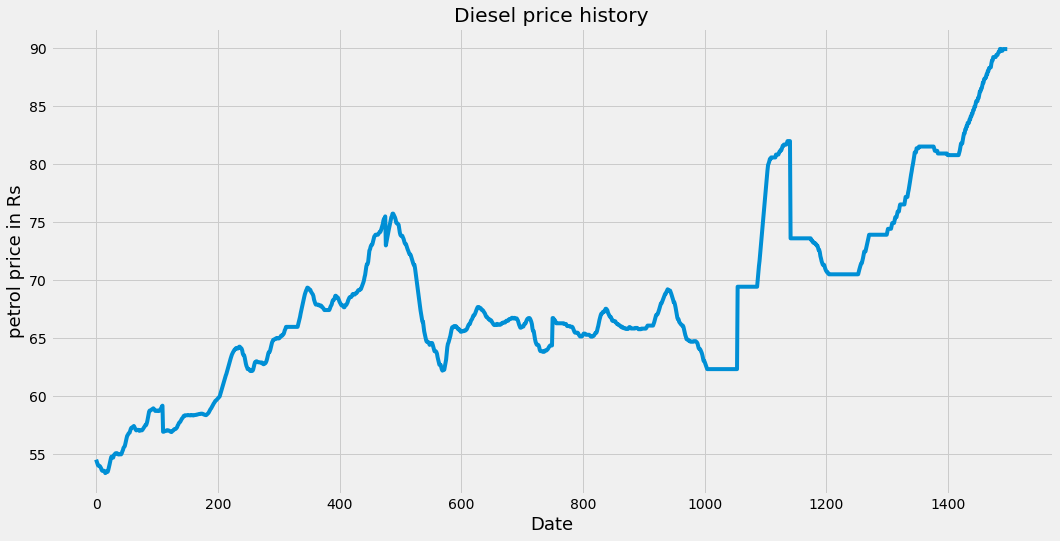

In [347]:
plt.figure(figsize=(16,8))
plt.title('Diesel price history')
plt.plot(df['Delhi-diesel'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('petrol price in Rs', fontsize=18)
plt.show()

In [348]:
data=df.filter(['Delhi-diesel'])
dataset=data.values
print(data)
print(dataset)

      Delhi-diesel
0            54.49
1            54.32
2            54.14
3            54.01
4            53.96
...            ...
1493         89.87
1494         89.87
1495         89.87
1496         89.87
1497         89.87

[1498 rows x 1 columns]
[[54.49]
 [54.32]
 [54.14]
 ...
 [89.87]
 [89.87]
 [89.87]]


In [349]:
training_data_len=int(len(dataset)*0.9)
print(training_data_len)

1348


Training data Prediction

In [350]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.03173735],
       [0.02708618],
       [0.02216142],
       ...,
       [0.9997264 ],
       [0.9997264 ],
       [0.9997264 ]])

In [351]:
train_data=scaled_data[0:training_data_len, :]
X_train=[]
Y_train=[]

for i in range (100, len(train_data)):
    X_train.append(train_data[i-100:i, 0])
    Y_train.append(train_data[i, 0])
    if i<=100 :
        print(X_train)
        print(Y_train)
        print()

[array([0.03173735, 0.02708618, 0.02216142, 0.01860465, 0.01723666,
       0.01723666, 0.01668947, 0.01422709, 0.01176471, 0.00766074,
       0.00547196, 0.00547196, 0.00547196, 0.00547196, 0.00355677,
       0.        , 0.00082079, 0.00383037, 0.00300958, 0.00300958,
       0.00766074, 0.01340629, 0.01997264, 0.02708618, 0.03337893,
       0.03857729, 0.03857729, 0.0374829 , 0.03638851, 0.04158687,
       0.04377565, 0.04541724, 0.04678523, 0.04678523, 0.04705882,
       0.04623803, 0.04432285, 0.04377565, 0.04404925, 0.04432285,
       0.04432285, 0.04404925, 0.04651163, 0.05088919, 0.05417237,
       0.05937073, 0.06155951, 0.06320109, 0.06894665, 0.07578659,
       0.08207934, 0.0878249 , 0.08974008, 0.09274966, 0.09439124,
       0.09521204, 0.0998632 , 0.10451436, 0.10697674, 0.10725034,
       0.10861833, 0.11025992, 0.11108071, 0.10807114, 0.10560876,
       0.10232558, 0.10068399, 0.10177839, 0.10177839, 0.10205198,
       0.10095759, 0.0995896 , 0.10123119, 0.10123119, 0.1009

In [352]:
X_train,Y_train= np.array(X_train),np.array(Y_train)
X_train.shape

(1248, 100)

In [353]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1248, 100, 1)

In [354]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [355]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_18 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [356]:
model.fit(X_train,Y_train,epochs=1,batch_size=1,verbose=1)

1248/1248 [==============================] - 37s 28ms/step - loss: 0.0029


In [357]:
# from keras.models import load_model
# model = load_model('../input/lstmmod/LSTM3.h5')

In [358]:
#
test_data=scaled_data[training_data_len- 100: , :]
len(test_data)

250

In [359]:
#
X_test=[]
Y_test=dataset[training_data_len:, :]

for i in range (100, len(test_data)):
    X_test.append(test_data[i-100:i, 0])

In [360]:
print(len(X_test))
print(len(Y_test))

150
150


In [361]:
X_test=np.array(X_test)

In [362]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(150, 100, 1)

In [363]:
predictions=model.predict(X_test)

In [364]:
predictions=scaler.inverse_transform(predictions)

In [365]:
rmse=np.sqrt(np.mean(predictions - Y_test)**2)
rmse

0.08939356079101476

In [366]:
rms=mean_squared_error(predictions,Y_test)
print(rms)

0.050863484862871955


In [367]:
math.sqrt(mean_squared_error(predictions,Y_test))

0.22552934368474528

      Delhi-diesel  Predictions
1348         81.32    81.264717
1349         81.32    81.448784
1350         81.32    81.585114
1351         81.32    81.669472
1352         81.47    81.707542
...            ...          ...
1493         89.87    89.963486
1494         89.87    89.974190
1495         89.87    89.980598
1496         89.87    89.983223
1497         89.87    89.983002

[150 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


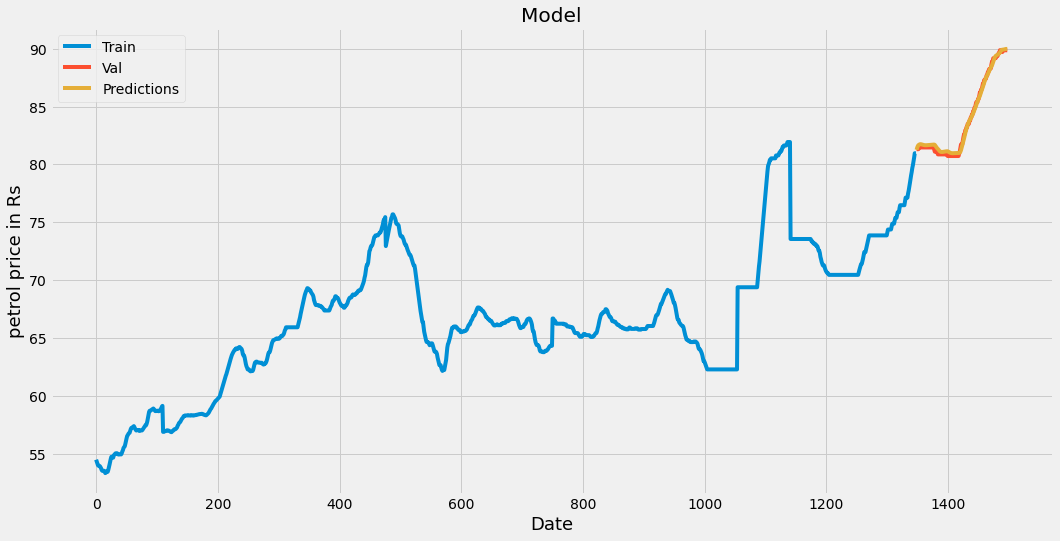

In [368]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
print(valid)

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('petrol price in Rs', fontsize=18)
plt.plot(train['Delhi-diesel'])
plt.plot(valid[['Delhi-diesel', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [369]:
valid

,Delhi-diesel,Predictions
1348,81.32,81.264717
1349,81.32,81.448784
1350,81.32,81.585114
1351,81.32,81.669472
1352,81.47,81.707542
...,...,...
1493,89.87,89.963486
1494,89.87,89.974190
1495,89.87,89.980598
1496,89.87,89.983223


In [370]:
len(test_data)

250

In [371]:
#
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [372]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [373]:
#jo upar
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

[1.0027639]
101
1 day input [0.749658   0.749658   0.749658   0.749658   0.749658   0.749658
 0.749658   0.749658   0.749658   0.749658   0.749658   0.749658
 0.749658   0.749658   0.749658   0.749658   0.749658   0.749658
 0.749658   0.75458276 0.76032832 0.76853625 0.77701778 0.77701778
 0.77701778 0.78604651 0.79425445 0.80109439 0.80109439 0.81039672
 0.81039672 0.81778386 0.81778386 0.82571819 0.82571819 0.82571819
 0.83365253 0.83365253 0.84103967 0.84103967 0.84787962 0.84787962
 0.85581395 0.85581395 0.86347469 0.86347469 0.87058824 0.87688098
 0.87688098 0.87688098 0.88454172 0.88454172 0.89247606 0.8998632
 0.8998632  0.90670315 0.90670315 0.91436389 0.92065663 0.92065663
 0.92886457 0.92886457 0.93242134 0.93242134 0.94008208 0.94008208
 0.94774282 0.94774282 0.95485636 0.95485636 0.95677155 0.95677155
 0.96634747 0.97318741 0.97318741 0.98084815 0.98084815 0.98084815
 0.98084815 0.98084815 0.98577291 0.98577291 0.98577291 0.99042408
 0.99288646 0.99288646 1.         1.     

## 

In [374]:
#
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [375]:
len(df)

1498

[[80.87]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.73]
 [80.91]
 [81.12]
 [81.42]
 [81.73]
 [81.73]
 [81.73]
 [82.06]
 [82.36]
 [82.61]
 [82.61]
 [82.95]
 [82.95]
 [83.22]
 [83.22]
 [83.51]
 [83.51]
 [83.51]
 [83.8 ]
 [83.8 ]
 [84.07]
 [84.07]
 [84.32]
 [84.32]
 [84.61]
 [84.61]
 [84.89]
 [84.89]
 [85.15]
 [85.38]
 [85.38]
 [85.38]
 [85.66]
 [85.66]
 [85.95]
 [86.22]
 [86.22]
 [86.47]
 [86.47]
 [86.75]
 [86.98]
 [86.98]
 [87.28]
 [87.28]
 [87.41]
 [87.41]
 [87.69]
 [87.69]
 [87.97]
 [87.97]
 [88.23]
 [88.23]
 [88.3 ]
 [88.3 ]
 [88.65]
 [88.9 ]
 [88.9 ]
 [89.18]
 [89.18]
 [89.18]
 [89.18]
 [89.18]
 [89.36]
 [89.36]
 [89.36]
 [89.53]
 [89.62]
 [89.62]
 [89.88]
 [89.88]
 [89.72]
 [89.72]
 [89.72]
 [89.87]
 [89.87]
 [89.87]
 [89.87]
 [89.87]
 [89.87]
 [89.87]
 [89.87]]
[[89.98101935]
 [89.99928431]
 [90.02705211]
 [90.06074556]
 [90.09840833]
 [90.13890757]
 [90.1815

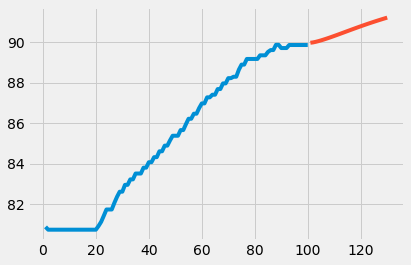

In [376]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[1398:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(scaled_data[1398:]))
print(scaler.inverse_transform(lst_output))

In [379]:
from tensorflow.keras.models import load_model
model.save('LSTMdsl.h5')